**Task:**

- analyze user data and select users for B and C groups.
- analyze product data and select products for X and Y groups.

File "abcfarma.csv":
- ga:dimension5 - user id
- ga:revenuePerItem - sales revenue
- ga:transactionRevenue - total revenue per user
- ga:itemQuantity - item quantity


File "Abcxyzfarma.csv":
- ga:revenuePerItem - sales revenue
- ga:itemQuantity - item quantity
- ga:month - month
- ga:productSku -  product id

ABC analysis is based on Pareto Principle.

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (15,10)

import warnings
warnings.filterwarnings('ignore')

# Customer segmentation

In [3]:
df=pd.read_csv('Abcfarma.csv', index_col=0)
df

,dimension5,transactionRevenue,revenuePerItem,itemQuantity
1,000b193b69a2165b529dfd294ffe5b01,3207,320.700000,10
2,00297a9fae441831026342e614c317cb,1076,269.000000,4
3,006fa2ae95385c2ce468e6a028aa97f3,10191,2059.060606,14
4,00894577f97cb14a7516e52d2552c3ff,1260,315.000000,4
5,00a8d554ed4e645b30bdca8df5899f65,3205,356.111111,9
...,...,...,...,...
4361,ffb2a6d74f9c7bd8c776d686c9e7a083,2331,333.000000,7
4362,ffb4dd28d071e9e641774efafedb43ef,2887,288.700000,10
4363,ffc583d6fd32e96012ba4152d528edc4,4124,515.500000,8
4364,ffcee145c51f0f422f6ca4a079bfb65b,1712,428.000000,4


In [4]:
df.rename(columns={'dimension5':'cid','transactionRevenue':'Revenue'}, inplace=True)
len(df.cid.unique()) # df.duplicated().sum()

4365

In [5]:
df.isna().sum()

cid               0
Revenue           0
revenuePerItem    0
itemQuantity      0
dtype: int64

In [6]:
df.dtypes

cid                object
Revenue             int64
revenuePerItem    float64
itemQuantity        int64
dtype: object

**Goal**

Data (products and customers) will be devided into three categories: A, B and C.

- А — valuable customers 20% who bring the business 80% of the turnover;
- В — middel 30% of customers providing 15% of sales;
- С — the least valuable 50% of customers generating only 5% of revenue.

The last category includes customers who made a one-time purchase for little money, or low-margin items.

In [7]:
len(df[(df['Revenue']==0)&(df['revenuePerItem']==0) & (df['itemQuantity']==0)])

1748

In [9]:
# df=df[df['Revenue']!=0]

In [11]:
def set_ABC_Class(df, crit):
    """
    df and df_column (not column name)
    """

    
    colname=crit.name+'ABC_Class'
    pc='cum'+crit.name
    
    df = df.sort_values(by=crit.name, ascending=False)
    
    df['percentage1'] = crit / sum(crit) * 100
    df[pc] = df['percentage1'].cumsum()
    
    df = df.round(2)
    
    df.loc[df[pc] < 80, colname] = 'A'
    df.loc[(df[pc] >= 80) & (df[pc] <= 95), colname] = 'B'
    df.loc[df[pc] > 95, colname] = 'C'
    
    del df['percentage1']      
    return df


In [12]:
df=set_ABC_Class(df, df['Revenue'])
df=set_ABC_Class(df, df['revenuePerItem'])
df=set_ABC_Class(df, df['itemQuantity'])

In [13]:
df

,cid,Revenue,revenuePerItem,itemQuantity,cumRevenue,RevenueABC_Class,cumrevenuePerItem,revenuePerItemABC_Class,cumitemQuantity,itemQuantityABC_Class
724,38529749f38f76a67996ef01e1b28437,100020,281.75,355,1.01,A,94.09,B,1.55,A
1224,5a5a1440d74e5d52b2c687fff21ddf6f,50000,759.00,164,1.51,A,45.28,A,2.27,A
792,3ed6b7528229df3bf0e363ee663d17a5,46082,2039.43,92,2.47,A,10.09,A,2.67,A
1419,6987f2eabeacd6524cb2abec23c23ade,37265,885.00,87,3.63,A,36.27,A,3.05,A
655,33943b1f6dba96919ef2cdb539c426cc,20471,1028.80,84,7.26,A,30.98,A,3.42,A
...,...,...,...,...,...,...,...,...,...,...
2835,92024,0,0.00,0,100.00,C,100.00,C,100.00,C
2834,92023,0,0.00,0,100.00,C,100.00,C,100.00,C
2833,92008,0,0.00,0,100.00,C,100.00,C,100.00,C
2832,92007,0,0.00,0,100.00,C,100.00,C,100.00,C


In [14]:
df['ABC_Class']=df.RevenueABC_Class.map(str)+df.revenuePerItemABC_Class.map(str)+df.itemQuantityABC_Class.map(str)

In [17]:
str(round(len(df[df['ABC_Class']=='BBB'])/len(df)*100,1))+'%'

'2.6%'

In [18]:
pngtable=pd.DataFrame(columns=['A', 'B', 'C'], index=['RevenueABC_Class','revenuePerItemABC_Class','itemQuantityABC_Class'])

In [19]:
# pngtable.loc['RevenueABC_Class']['A']=str(round(len(df[df['RevenueABC_Class']=='A'])/len(df)*100,1))+'%'

In [20]:
def filling(pg,dq):
    
    for i in pg.index.values:
        for j in pg.columns.values:
            pg.loc[i][j]=str(round(len(dq[dq[i]==j])/len(dq)*100,1))+'%'

filling(pngtable,df)

In [21]:
pngtable.reset_index(inplace=True)

In [22]:
pngtable.rename(columns={'index':'Type'},inplace=True)

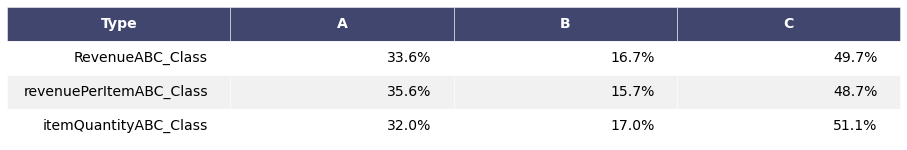

In [23]:
import numpy as np
import six

def render_mpl_table(data, col_width=6.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

ax = render_mpl_table(pngtable, header_columns=0, col_width=4.0)

In [24]:
df=df.sort_values(by='Revenue', ascending=False)
df

,cid,Revenue,revenuePerItem,itemQuantity,cumRevenue,RevenueABC_Class,cumrevenuePerItem,revenuePerItemABC_Class,cumitemQuantity,itemQuantityABC_Class,ABC_Class
724,38529749f38f76a67996ef01e1b28437,100020,281.75,355,1.01,A,94.09,B,1.55,A,ABA
1224,5a5a1440d74e5d52b2c687fff21ddf6f,50000,759.00,164,1.51,A,45.28,A,2.27,A,AAA
3932,d82bbd4f4b2bbd750c0fe0a331c2e6af,49728,2739.82,32,2.01,A,4.66,A,12.31,A,AAA
792,3ed6b7528229df3bf0e363ee663d17a5,46082,2039.43,92,2.47,A,10.09,A,2.67,A,AAA
1748,7cb80fd579cdb6710b1dac4b088fcfec,40075,3168.88,57,2.87,A,1.31,A,5.42,A,AAA
...,...,...,...,...,...,...,...,...,...,...,...
1099,53c0c4d50154e0610063cfee935d9914,0,0.00,0,100.00,C,100.00,C,100.00,C,CCC
1096,53968,0,0.00,0,100.00,C,100.00,C,100.00,C,CCC
3231,95016,0,0.00,0,100.00,C,100.00,C,100.00,C,CCC
1095,53910,0,0.00,0,100.00,C,100.00,C,100.00,C,CCC


In [25]:
aaabbbccc=pd.DataFrame(columns=['AAA', 'BBB', 'CCC'],index=[0])

def filling(pg,dq):
    
    for i in pg.index.values:
        for j in pg.columns.values:
            pg.loc[i][j]=str(round(len(dq[dq['ABC_Class']==j])/len(dq)*100,1))+'%'

filling(aaabbbccc,df)

aaabbbccc

,AAA,BBB,CCC
0,14.7%,2.6%,40.0%


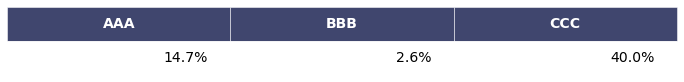

In [26]:
ax = render_mpl_table(aaabbbccc, header_columns=0, col_width=4.0)

**Lorenz curve:**

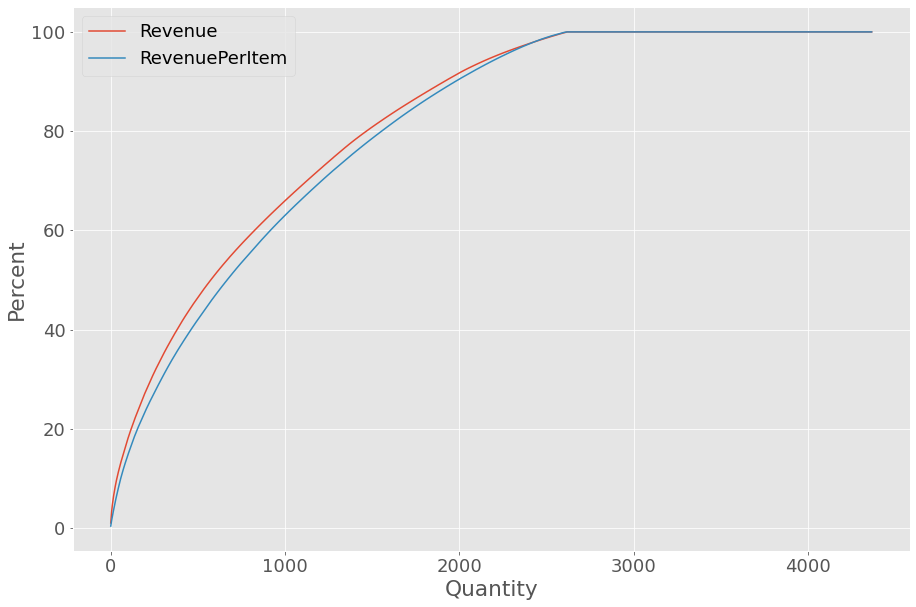

In [28]:
import numpy as np

x=np.arange(len(df))
plt.plot(x,df.sort_values(by='cumRevenue')['cumRevenue'], label='Revenue')
plt.plot(x,df.sort_values(by='cumrevenuePerItem')['cumrevenuePerItem'], label='RevenuePerItem')

plt.xlabel('Quantity')
plt.ylabel('Percent')
plt.legend()
# df['cumRevenue'].hist(cumulative=True)

In [29]:
df.groupby('RevenueABC_Class')['Revenue'].count()

RevenueABC_Class
A    1467
B     730
C    2168
Name: Revenue, dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

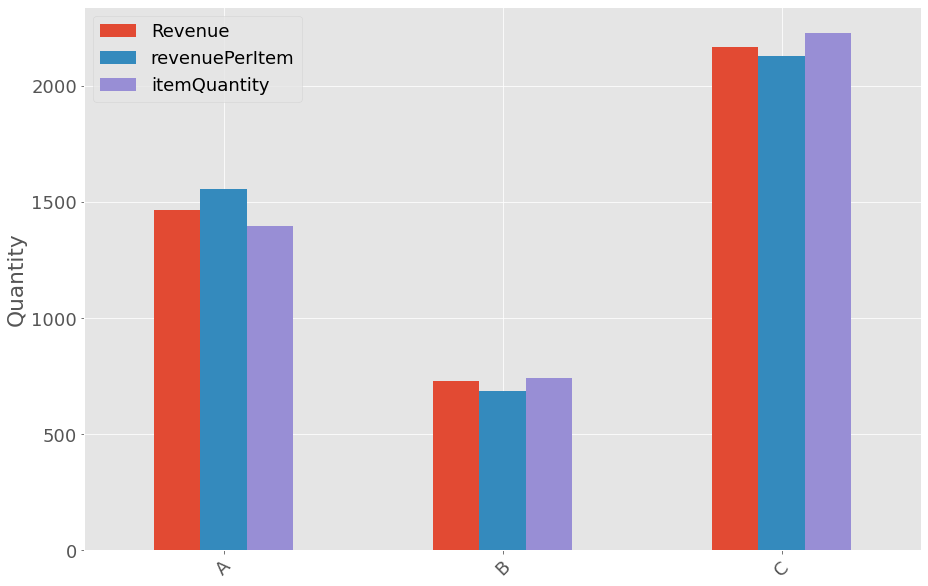

In [31]:
d1=pd.DataFrame(df.groupby('RevenueABC_Class')['Revenue'].count())
d2=pd.DataFrame(df.groupby('revenuePerItemABC_Class')['revenuePerItem'].count())
d3=pd.DataFrame(df.groupby('itemQuantityABC_Class')['itemQuantity'].count())

d=pd.concat([d1,d2, d3], axis=1)

ax = d.plot.bar()
# ax.set_xticklabels(['A','B','C'])
plt.ylabel('Quantity')
plt.xticks(rotation=45)

In [32]:
# df.loc[df['Revenue'] >= df[df['Revenue']!=0]['Revenue'].quantile(0.8)] # top 20%

In [36]:
# df[df['Revenue']!=0]['Revenue'].quantile(0.8)
# df['Revenue'].quantile(0.8)

In [37]:
# df.loc[(df['Revenue'] >= df[df['Revenue']!=0]['Revenue'].quantile(0.5)) & (df['Revenue'] < df[df['Revenue']!=0]['Revenue'].quantile(0.8))]

In [38]:
dfexport=df.copy()
dfexport.drop(columns=['cumRevenue', 'cumrevenuePerItem', 'cumitemQuantity'],inplace=True)

In [39]:
dfexport=dfexport[(dfexport['RevenueABC_Class']!='A')&(dfexport['revenuePerItemABC_Class']!='A')&(dfexport['itemQuantityABC_Class']!='A')]

In [40]:
dfexport.to_csv('bcsegments.csv', encoding='utf-16', sep='\t')

# ABC/XYZ - product segmentation

For each product, a coefficient is calculated that demonstrates the difference in sales as a percentage - what is the difference between sales for a given period from the average. 

A coefficient close to zero means stable sales of the product, while strong deviations signal a disruption in sales that needs to be worked on.
 

- Class X - goods sold in the same quantity every period. Based on this data, a task for the purchasing department is formed: no surplus in stock, due to the correct order volume;
- Class Y - goods with an average stable sales level. Factors affecting the number of sales: seasonality, fashion trends, the presence or absence of advertising, etc. Sales personnel should review them before placing an order with a supplier;
- Class Z - goods that are extremely rarely in demand, which is why it is impossible to accurately predict sales.

BCG is the most informative analysis that combines both ABC and XYZ classifications. It defines a sign of importance and reliability, as a result of which these groups appear: AX, AY, AZ, BX, BY, BZ, CX, CY, CZ.

In [41]:
data=pd.read_csv('Abcxyzfarma.csv', index_col=0)
data

,productSku,month,revenuePerItem,itemQuantity
1,(not set),6,247.0,1
2,103113,6,0.0,0
3,107123,6,0.0,0
4,107125,6,0.0,0
5,108166,6,0.0,0
...,...,...,...,...
2853,977594,9,0.0,0
2854,981638,9,0.0,0
2855,983944,9,0.0,0
2856,983951,9,878.0,5


In [42]:
len(data['productSku'].unique())

748

In [43]:
data.month.unique()

array([6, 7, 8, 9], dtype=int64)

In [44]:
df.isna().sum()

cid                        0
Revenue                    0
revenuePerItem             0
itemQuantity               0
cumRevenue                 0
RevenueABC_Class           0
cumrevenuePerItem          0
revenuePerItemABC_Class    0
cumitemQuantity            0
itemQuantityABC_Class      0
ABC_Class                  0
dtype: int64

In [45]:
data[data['productSku']=='(not set)']

,productSku,month,revenuePerItem,itemQuantity
1,(not set),6,247.0,1
699,(not set),7,669.0,1
1418,(not set),8,0.0,0
2145,(not set),9,0.0,0


In [46]:
dataabc=data.copy()
del dataabc['month']

In [47]:
dataabc=dataabc.groupby('productSku').agg({'revenuePerItem': lambda x: x.sum(), # Recency
                                        'itemQuantity': lambda x: x.sum()}).reset_index() 

In [49]:
# dataabc[(dataabc['itemQuantity']==0)&(dataabc['revenuePerItem']==0)]

In [50]:
dataabc=set_ABC_Class(dataabc, dataabc['revenuePerItem'])
dataabc=set_ABC_Class(dataabc, dataabc['itemQuantity'])

In [51]:
dataabc

,productSku,revenuePerItem,itemQuantity,cumrevenuePerItem,revenuePerItemABC_Class,cumitemQuantity,itemQuantityABC_Class
359,29090,47713.82,582,25.66,A,2.55,A
281,182916,63410.43,563,13.73,A,5.01,A
143,1666,8371.76,431,83.68,B,6.90,A
101,1616,30173.44,391,39.65,A,8.61,A
358,29073,62146.69,355,15.39,A,10.16,A
...,...,...,...,...,...,...,...
615,678967,0.00,0,100.00,C,100.00,C
616,679409,0.00,0,100.00,C,100.00,C
617,679411,0.00,0,100.00,C,100.00,C
744,981638,0.00,0,100.00,C,100.00,C


In [52]:
dataabc['ABC_Class']=dataabc.revenuePerItemABC_Class.map(str)+dataabc.itemQuantityABC_Class.map(str)

In [53]:
# x=np.arange(len(dataabc.groupby('ABC_Class').get_group('AC')['cumrevenuePerItem']))
# plt.plot(x,dataabc.sort_values(by='cumrevenuePerItem').groupby('ABC_Class').get_group('AC')['cumrevenuePerItem'])

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

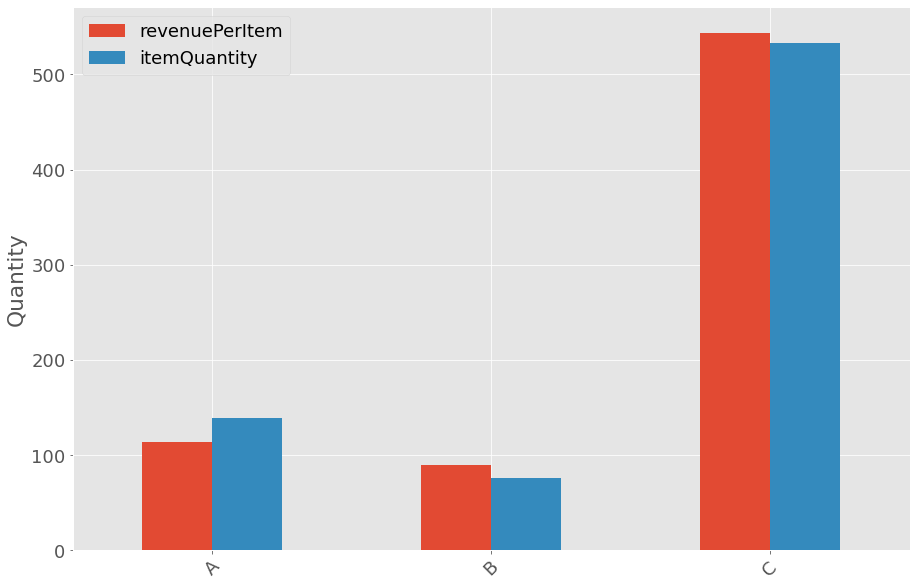

In [54]:
d1=pd.DataFrame(dataabc.groupby('revenuePerItemABC_Class')['revenuePerItem'].count())
d2=pd.DataFrame(dataabc.groupby('itemQuantityABC_Class')['itemQuantity'].count())

d=pd.concat([d1,d2], axis=1)


ax = d.plot.bar()
# ax.set_xticklabels(['A','B','C'])
plt.ylabel('Quantity')

plt.xticks(rotation=45)

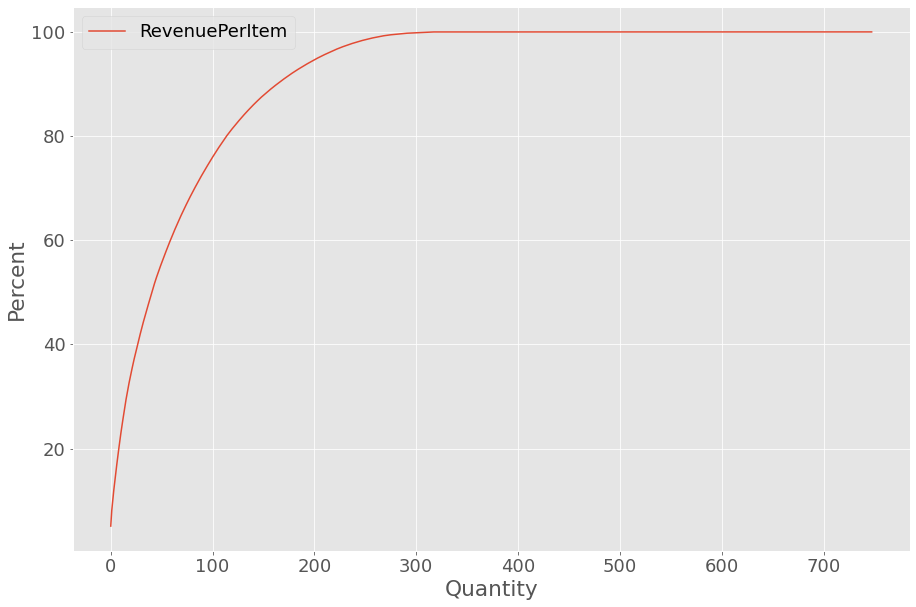

In [55]:
x=np.arange(len(dataabc))
plt.plot(x,dataabc.sort_values(by='cumrevenuePerItem')['cumrevenuePerItem'], label='RevenuePerItem')
plt.xlabel('Quantity')
plt.ylabel('Percent')
plt.legend()

In [56]:
print(len(dataabc[dataabc['ABC_Class']=='AA'])/len(dataabc)*100)
print(len(dataabc[dataabc['ABC_Class']=='BB'])/len(dataabc)*100)
print(len(dataabc[dataabc['ABC_Class']=='CC'])/len(dataabc)*100)

11.229946524064172
4.144385026737968
68.98395721925134


In [57]:
pnggoods=pd.DataFrame(columns=['A', 'B', 'C'], index=['revenuePerItemABC_Class','itemQuantityABC_Class'])

def filling(pg,dq):
    
    for i in pg.index.values:
        for j in pg.columns.values:
            pg.loc[i][j]=str(round(len(dq[dq[i]==j])/len(dq)*100,1))+'%'

filling(pnggoods,dataabc)

In [58]:
pnggoods

,A,B,C
revenuePerItemABC_Class,15.2%,12.0%,72.7%
itemQuantityABC_Class,18.6%,10.2%,71.3%


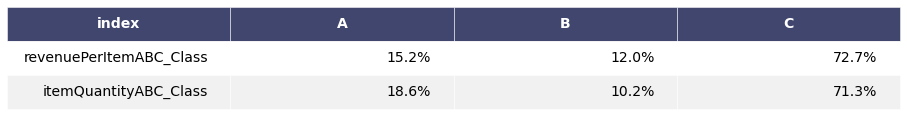

In [59]:
pnggoods.reset_index(inplace=True)

import numpy as np
import six

def render_mpl_table(data, col_width=6.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

ax = render_mpl_table(pnggoods, header_columns=0, col_width=4.0)

In [60]:
data

,productSku,month,revenuePerItem,itemQuantity
1,(not set),6,247.0,1
2,103113,6,0.0,0
3,107123,6,0.0,0
4,107125,6,0.0,0
5,108166,6,0.0,0
...,...,...,...,...
2853,977594,9,0.0,0
2854,981638,9,0.0,0
2855,983944,9,0.0,0
2856,983951,9,878.0,5


In [61]:
dataxyz=data.copy()

dataxyz=dataxyz.groupby(['productSku','month']).agg({'revenuePerItem': lambda x: x.sum(), # Recency
                                        'itemQuantity': lambda x: x.sum() }).reset_index() 
dataxyz

,productSku,month,revenuePerItem,itemQuantity
0,(not set),6,247.0,1
1,(not set),7,669.0,1
2,(not set),8,0.0,0
3,(not set),9,0.0,0
4,103113,6,0.0,0
...,...,...,...,...
2852,977594,9,0.0,0
2853,981638,9,0.0,0
2854,983944,9,0.0,0
2855,983951,9,878.0,5


In [62]:
data[data['productSku']=='1723']

,productSku,month,revenuePerItem,itemQuantity
185,1723,6,2643.0,12
881,1723,7,5472.0,22
1602,1723,8,7619.0,44
2326,1723,9,1374.0,4


In [63]:
df_XYZ=pd.DataFrame(columns=['productSku','6','7','8','9','coef','group'])

def f(df):
    month=['6','7','8','9']
    index=len(df_XYZ)
    vr=df['itemQuantity'].values
    
    df_XYZ.loc[index,'productSku']=df['productSku'].values[0] # id
    # sales
    for i in range(len(vr)):
        df_XYZ.loc[index,month[i]]=vr[i]
    # coeff
    df_XYZ.loc[index,'coef']=round(vr.std()/vr.mean(),2)
    

dataxyz[['productSku','month','itemQuantity']].groupby('productSku').apply(func=f)
df_XYZ

,productSku,6,7,8,9,coef,group
0,(not set),1,1,0,0,1,NaN
1,103113,0,0,0,0,NaN,NaN
2,107123,0,0,0,0,NaN,NaN
3,107125,0,0,0,NaN,NaN,NaN
4,108166,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...
743,977594,0,0,NaN,NaN,NaN,NaN
744,981638,0,NaN,NaN,NaN,NaN,NaN
745,983944,0,NaN,NaN,NaN,NaN,NaN
746,983951,5,NaN,NaN,NaN,0,NaN


In [64]:
df_XYZ=df_XYZ.sort_values(by='coef', ascending=False)

In [65]:
_25pc=df_XYZ.coef.max()*0.25
_10pc=df_XYZ.coef.max()*0.1

for i,row in df_XYZ.iterrows():
    coef=row['coef']
#     big deviation
    if(coef>_25pc):
        row['group']='Z'
    
    if((coef>=_10pc)&(coef<=_25pc)):
        row['group']='Y'
  
    if(coef<_10pc):
        row['group']='X'

In [67]:
# df_XYZ=df_XYZ[df_XYZ['coef'].notna()]

In [68]:
df_XYZ

,productSku,6,7,8,9,coef,group
78,15407,0,0,4,0,1.73,Z
332,244118,0,1,0,0,1.73,Z
422,5159,0,2,0,0,1.73,Z
263,18113,0,0,1,0,1.73,Z
400,4936,0,0,1,0,1.73,Z
...,...,...,...,...,...,...,...
742,977593,0,0,NaN,NaN,NaN,NaN
743,977594,0,0,NaN,NaN,NaN,NaN
744,981638,0,NaN,NaN,NaN,NaN,NaN
745,983944,0,NaN,NaN,NaN,NaN,NaN


In [69]:
dataabc

,productSku,revenuePerItem,itemQuantity,cumrevenuePerItem,revenuePerItemABC_Class,cumitemQuantity,itemQuantityABC_Class,ABC_Class
359,29090,47713.82,582,25.66,A,2.55,A,AA
281,182916,63410.43,563,13.73,A,5.01,A,AA
143,1666,8371.76,431,83.68,B,6.90,A,BA
101,1616,30173.44,391,39.65,A,8.61,A,AA
358,29073,62146.69,355,15.39,A,10.16,A,AA
...,...,...,...,...,...,...,...,...
615,678967,0.00,0,100.00,C,100.00,C,CC
616,679409,0.00,0,100.00,C,100.00,C,CC
617,679411,0.00,0,100.00,C,100.00,C,CC
744,981638,0.00,0,100.00,C,100.00,C,CC


In [70]:
dataabc[dataabc['productSku']=='29090']

,productSku,revenuePerItem,itemQuantity,cumrevenuePerItem,revenuePerItemABC_Class,cumitemQuantity,itemQuantityABC_Class,ABC_Class
359,29090,47713.82,582,25.66,A,2.55,A,AA


In [71]:
final=pd.merge(dataabc, df_XYZ, left_on='productSku', right_on='productSku')

In [72]:
final['ABCXYZ']=final.revenuePerItemABC_Class.map(str)+final.group.map(str)

In [73]:
final.sort_values(by='coef')

,productSku,revenuePerItem,itemQuantity,cumrevenuePerItem,revenuePerItemABC_Class,cumitemQuantity,itemQuantityABC_Class,ABC_Class,6,7,8,9,coef,group,ABCXYZ
277,983951,878.0,5,99.42,C,99.64,C,CC,5,NaN,NaN,NaN,0,X,CX
291,96407,244.0,2,99.97,C,99.84,C,CC,1,1,NaN,NaN,0,X,CX
192,14608,3899.0,39,94.86,B,91.76,B,BB,10,10,10,9,0.04,X,BX
119,852747,14686.5,69,67.97,A,74.51,A,AA,15,20,17,17,0.1,X,AX
142,111613,4719.0,61,92.58,B,80.98,B,BB,16,15,18,12,0.14,X,BX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,678967,0.0,0,100.00,C,100.00,C,CC,0,0,0,0,NaN,NaN,Cnan
744,679409,0.0,0,100.00,C,100.00,C,CC,0,0,0,0,NaN,NaN,Cnan
745,679411,0.0,0,100.00,C,100.00,C,CC,0,0,0,0,NaN,NaN,Cnan
746,981638,0.0,0,100.00,C,100.00,C,CC,0,NaN,NaN,NaN,NaN,NaN,Cnan


In [74]:
abcxyz=final.copy()
abcxyz.drop(columns=['cumrevenuePerItem','cumitemQuantity','6','7','8','9'], inplace=True)

In [75]:
abcxyz=abcxyz[abcxyz['group'].notna()]
abcxyz

,productSku,revenuePerItem,itemQuantity,revenuePerItemABC_Class,itemQuantityABC_Class,ABC_Class,coef,group,ABCXYZ
0,29090,47713.82,582,A,A,AA,0.47,Z,AZ
1,182916,63410.43,563,A,A,AA,0.64,Z,AZ
2,1666,8371.76,431,B,A,BA,0.52,Z,BZ
3,1616,30173.44,391,A,A,AA,0.34,Y,AY
4,29073,62146.69,355,A,A,AA,0.44,Z,AZ
...,...,...,...,...,...,...,...,...,...
317,18113,423.00,1,C,C,CC,1.73,Z,CZ
318,5203,479.00,1,C,C,CC,1.73,Z,CZ
319,5359,459.00,1,C,C,CC,1.73,Z,CZ
320,5292,459.00,1,C,C,CC,1.73,Z,CZ


In [76]:
abcxyz=abcxyz.sort_values(by='coef')

In [77]:
abcxyz.rename(columns={'group':'XYZ_Class', 'ABCXYZ':'ABCXYZ_Rev'}, inplace=True)

In [78]:
del abcxyz['coef']
abcxyz

,productSku,revenuePerItem,itemQuantity,revenuePerItemABC_Class,itemQuantityABC_Class,ABC_Class,XYZ_Class,ABCXYZ_Rev
277,983951,878.0,5,C,C,CC,X,CX
291,96407,244.0,2,C,C,CC,X,CX
192,14608,3899.0,39,B,B,BB,X,BX
119,852747,14686.5,69,A,A,AA,X,AX
142,111613,4719.0,61,B,B,BB,X,BX
...,...,...,...,...,...,...,...,...
294,205997,546.0,2,C,C,CC,Z,CZ
293,5159,485.0,2,C,C,CC,Z,CZ
283,225002,1506.0,3,C,C,CC,Z,CZ
305,20044,69.0,1,C,C,CC,Z,CZ


In [79]:
abcxyz

,productSku,revenuePerItem,itemQuantity,revenuePerItemABC_Class,itemQuantityABC_Class,ABC_Class,XYZ_Class,ABCXYZ_Rev
277,983951,878.0,5,C,C,CC,X,CX
291,96407,244.0,2,C,C,CC,X,CX
192,14608,3899.0,39,B,B,BB,X,BX
119,852747,14686.5,69,A,A,AA,X,AX
142,111613,4719.0,61,B,B,BB,X,BX
...,...,...,...,...,...,...,...,...
294,205997,546.0,2,C,C,CC,Z,CZ
293,5159,485.0,2,C,C,CC,Z,CZ
283,225002,1506.0,3,C,C,CC,Z,CZ
305,20044,69.0,1,C,C,CC,Z,CZ


In [80]:
xygoods=abcxyz.copy()

In [81]:
xygoods=xygoods[xygoods['XYZ_Class']!='Z']

In [82]:
xygoods.to_csv('xygoods.csv', encoding='utf-16', sep='\t')

In [83]:
str(round(len(abcxyz[abcxyz['XYZ_Class']=='X'])/(len(abcxyz))*100,1))+'%'

'1.9%'

In [84]:
xyzgoods=pd.DataFrame(columns=['X', 'Y', 'Z'], index=[0])

def filling(pg,dq):
    
    for j in pg.index.values:
        for i in pg.columns.values:
            pg.loc[j,i]=str(round(len(abcxyz[abcxyz['XYZ_Class']==i])/(len(abcxyz))*100,1))+'%'


filling(xyzgoods,abcxyz)

In [85]:
xyzgoods

,X,Y,Z
0,1.9%,19.9%,78.3%


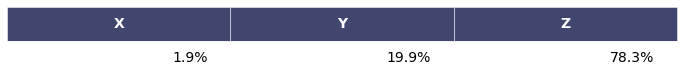

In [86]:
ax = render_mpl_table(xyzgoods, header_columns=0, col_width=4.0)

In [87]:
abcxyz[abcxyz['ABCXYZ_Rev']=='AX']

,productSku,revenuePerItem,itemQuantity,revenuePerItemABC_Class,itemQuantityABC_Class,ABC_Class,XYZ_Class,ABCXYZ_Rev
119,852747,14686.5,69,A,A,AA,X,AX


In [88]:
bcg=pd.DataFrame(columns=['AX', 'AY', 'AZ', 'BX', 'BY', 'BZ', 'CX', 'CY', 'CZ'], index=[0])

def filling(pg,dq):
    
    for j in pg.index.values:
        for i in pg.columns.values:
            pg.loc[j,i]=str(round(len(abcxyz[abcxyz['ABCXYZ_Rev']==i])/(len(abcxyz))*100,1))+'%'


filling(bcg,abcxyz)

bcg

,AX,AY,AZ,BX,BY,BZ,CX,CY,CZ
0,0.3%,7.5%,27.6%,0.6%,8.1%,19.3%,0.9%,4.3%,31.4%


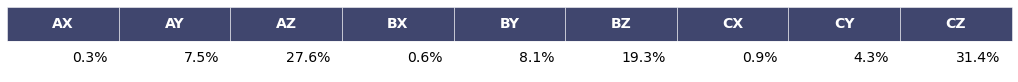

In [89]:
ax = render_mpl_table(bcg, header_columns=0, col_width=2.0)